In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score
pd.options.display.float_format = "{:,.2f}".format
import sys
sys.path.append("../")
from src import soporte_ajuste as sa

In [2]:
df = pd.read_csv("../data/api_rent_madrid_final_1.csv", index_col = 0, sep=";").reset_index(drop=True)
df.describe()

,price,propertyType,operation,size,exterior,rooms,bathrooms,municipality,status,newDevelopment,floor,district,neighborhood,hasLift,hasParkingSpace,typology,subTypology,priceByArea
count,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00
mean,693.75,0.28,0.28,0.02,0.28,0.00,0.00,0.28,0.28,0.28,0.28,0.28,0.27,0.28,0.28,0.28,0.28,0.01
std,59.59,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
min,450.00,0.27,0.27,0.01,0.27,0.00,0.00,0.27,0.27,0.27,0.27,0.26,0.27,0.27,0.27,0.28,0.27,0.00
25%,660.00,0.28,0.28,0.02,0.28,0.00,0.00,0.28,0.28,0.28,0.27,0.28,0.27,0.27,0.28,0.28,0.28,0.00
50%,702.50,0.28,0.28,0.02,0.28,0.00,0.00,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.00
75%,740.00,0.28,0.28,0.03,0.28,0.00,0.00,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.01
max,750.00,0.28,0.28,0.05,0.28,0.00,0.00,0.29,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.01


In [3]:
# instanciamos la clase de regresión lineal
analisis = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='price')

params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

# llamamos a la función para ajustar el modelo
analisis.ajustar_modelo(modelo='tree', param_grid=params_arbol, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = analisis.obtener_resultados()
df_resultados.sample(3)

d:\develop\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,Real,Predicho,Conjunto,Modelo,Residuos
309,650.00,729.11,Test,tree,-79.11
7,550.00,718.67,Test,tree,-168.67
333,695.00,631.50,Train,tree,63.50


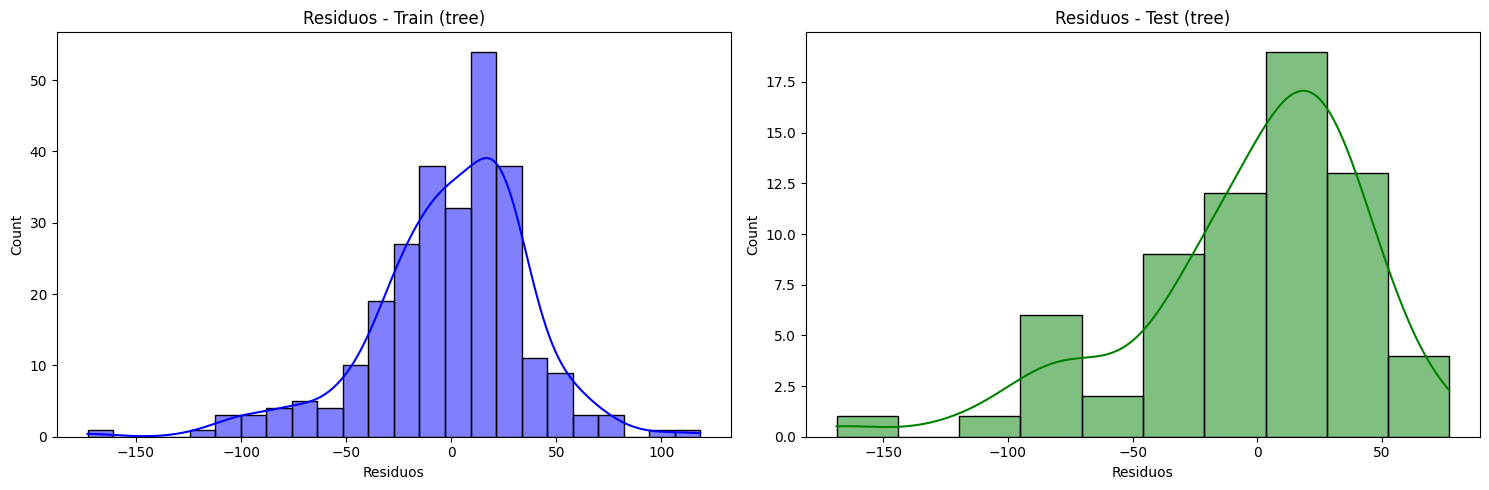

In [4]:
analisis.plot_residuos("tree")

In [5]:
analisis.calcular_metricas("tree")

,train,test
R2,0.59,0.48
MAE,27.95,34.06
MSE,"1,401.27","2,072.96"
RMSE,37.43,45.53


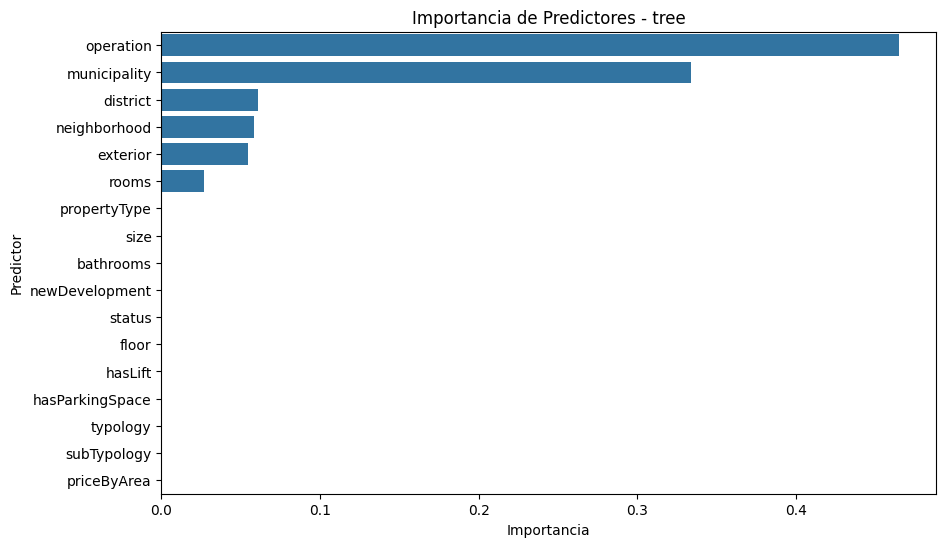

,Predictor,Importancia
1,operation,0.47
6,municipality,0.33
10,district,0.06
11,neighborhood,0.06
3,exterior,0.05
4,rooms,0.03
0,propertyType,0.00
2,size,0.00
5,bathrooms,0.00
8,newDevelopment,0.00


In [6]:
analisis.importancia_predictores("tree")

In [7]:
# instanciamos la clase de regresión lineal
analisis_random_forest = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='price')

params_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

# llamamos a la función para ajustar el modelo
analisis_random_forest.ajustar_modelo(modelo='random_forest', scoring="neg_mean_squared_error", param_grid=params_rf)

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_analisis_random_forest = analisis_random_forest.obtener_resultados()
df_resultados_analisis_random_forest.head(3)

d:\develop\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,Real,Predicho,Conjunto,Modelo,Residuos
224,740.00,727.65,Train,random_forest,12.35
78,700.00,683.68,Train,random_forest,16.32
295,700.00,696.15,Train,random_forest,3.85


In [8]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.74,0.64
MAE,23.16,26.84
MSE,882.10,"1,444.21"
RMSE,29.70,38.00


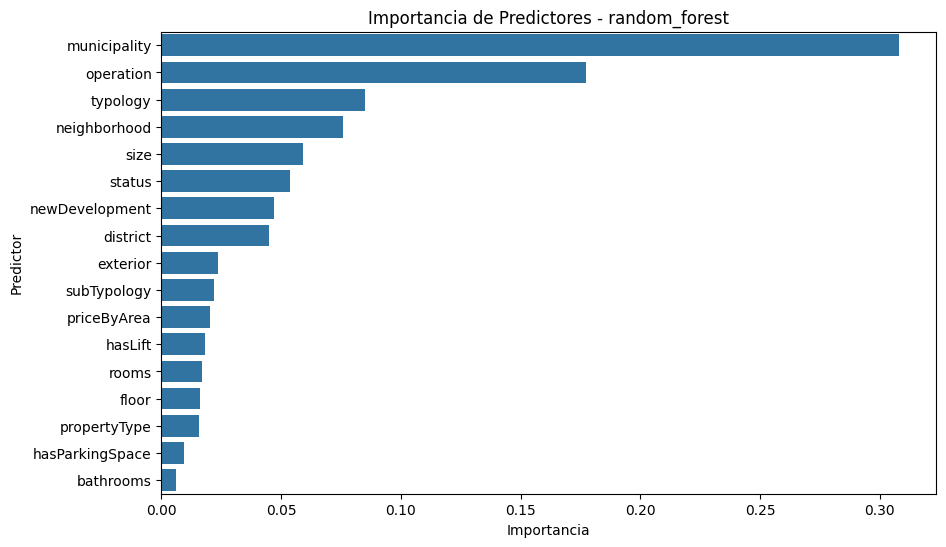

,Predictor,Importancia
6,municipality,0.31
1,operation,0.18
14,typology,0.08
11,neighborhood,0.08
2,size,0.06
7,status,0.05
8,newDevelopment,0.05
10,district,0.04
3,exterior,0.02
15,subTypology,0.02


In [9]:
analisis_random_forest.importancia_predictores("random_forest")

In [10]:
# instanciamos la clase de regresión lineal
analisis_gradient_boosting = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='price')

params_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# llamamos a la función para ajustar el modelo
analisis_gradient_boosting.ajustar_modelo(modelo='gradient_boosting',param_grid = params_gb, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient_boosting = analisis_gradient_boosting.obtener_resultados()
df_resultados_gradient_boosting.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
224,740.00,740.78,Train,gradient_boosting,-0.78
78,700.00,691.36,Train,gradient_boosting,8.64
295,700.00,698.41,Train,gradient_boosting,1.59


In [11]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")

,train,test
R2,0.99,0.71
MAE,4.87,24.60
MSE,35.85,"1,143.91"
RMSE,5.99,33.82


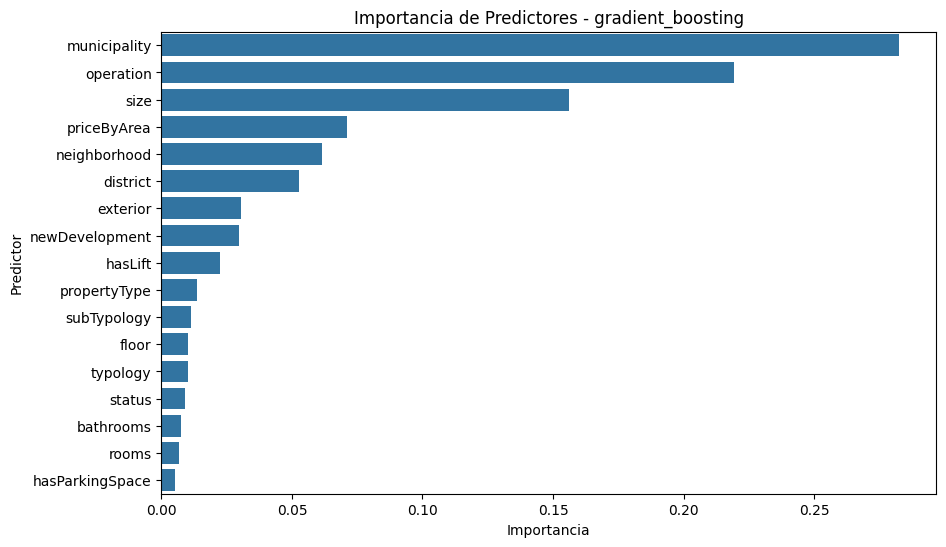

,Predictor,Importancia
6,municipality,0.28
1,operation,0.22
2,size,0.16
16,priceByArea,0.07
11,neighborhood,0.06
10,district,0.05
3,exterior,0.03
8,newDevelopment,0.03
12,hasLift,0.02
0,propertyType,0.01


In [12]:
analisis_gradient_boosting.importancia_predictores("gradient_boosting")

In [13]:
# instanciamos la clase de regresión lineal
analisis_xgboost= sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='price')

params_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 4],  # Equivalente a min_samples_leaf
    'subsample': [0.8, 1.0],        # Para evitar sobreajuste
    'colsample_bytree': [0.8, 1.0]  # Selección de columnas al construir cada árbol
}

# llamamos a la función para ajustar el modelo
analisis_xgboost.ajustar_modelo(modelo='xgboost',param_grid=params_xgb, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = analisis_xgboost.obtener_resultados()
df_resultados_xgboost.head(3)

d:\develop\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,Real,Predicho,Conjunto,Modelo,Residuos
224,740.00,743.09,Train,xgboost,-3.09
78,700.00,692.67,Train,xgboost,7.33
295,700.00,700.18,Train,xgboost,-0.18


In [14]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.98,0.75
MAE,5.90,22.57
MSE,58.71,999.39
RMSE,7.66,31.61


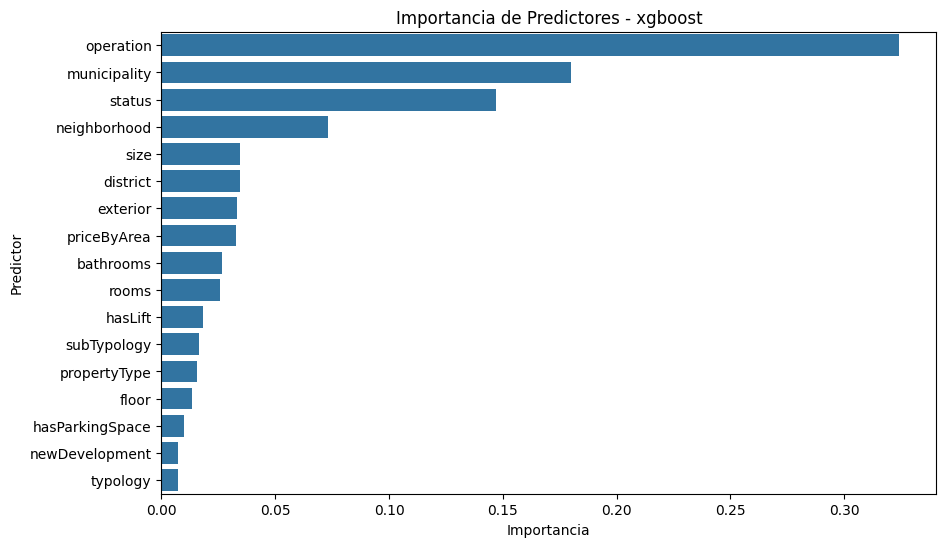

,Predictor,Importancia
1,operation,0.32
6,municipality,0.18
7,status,0.15
11,neighborhood,0.07
2,size,0.03
10,district,0.03
3,exterior,0.03
16,priceByArea,0.03
5,bathrooms,0.03
4,rooms,0.03


In [15]:
analisis_xgboost.importancia_predictores("xgboost")

In [16]:
analisis.calcular_metricas("tree")

,train,test
R2,0.59,0.48
MAE,27.95,34.06
MSE,"1,401.27","2,072.96"
RMSE,37.43,45.53


In [17]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.98,0.75
MAE,5.90,22.57
MSE,58.71,999.39
RMSE,7.66,31.61


In [18]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")

,train,test
R2,0.99,0.71
MAE,4.87,24.60
MSE,35.85,"1,143.91"
RMSE,5.99,33.82


In [19]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.74,0.64
MAE,23.16,26.84
MSE,882.10,"1,444.21"
RMSE,29.70,38.00


In [23]:
analisis_random_forest.obtener_resultados().head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
224,740.00,727.65,Train,random_forest,12.35
78,700.00,683.68,Train,random_forest,16.32
295,700.00,696.15,Train,random_forest,3.85
